# Notebook to view parsed data from sql database 
## Also view time-series variation in Monte-Carlo time
Author: Venkitesh Ayyar (vayyar@bu.edu) \
Nov 19, 2023

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sqlite3

import subprocess as sp
import os 
import glob
import pandas as pd
import itertools
import yaml
import sys

In [3]:
import gvar as gv

In [4]:
%matplotlib widget

In [5]:
sys.path.append('modules')
from modules_parse_hmc_Grid import *
# from modules_measurement import *


$$ \chi_\mathcal{O} = L^3 \left[ \langle \mathcal{O}^2 \rangle - {(\langle \mathcal{O} \rangle )}^2 \right] = L^3 \langle (\mathcal{O} - \bar{\mathcal{O}})^2\rangle $$ 

$$ \kappa_\mathcal{O} = \frac{\langle \mathcal{O}^4 \rangle - 4 \langle \mathcal{O}^3 \rangle \langle \mathcal{O} \rangle +6 \langle \mathcal{O}^2 \rangle {\langle \mathcal{O} \rangle} ^2 - 3 {\langle \mathcal{O} \rangle}^4 }{\chi_\mathcal{O}^2} = \frac{ \langle \left( \mathcal{O-\bar{\mathcal{O}}} \right) ^4 \rangle }{\chi_\mathcal{O}^2}$$ 

In [6]:
def f_get_run_info_dict(dict1,input_dict,run_label):
    '''   
    Get dictionary with run info that will be added to Dataframe as columns
    '''
    keys=['Lx','Lt','beta','mf']
    for key in keys:
        dict1[key]=input_dict[key]
    
    run_key='beta-%s_mf-%s_Lx-%s_Lt-%s'%(input_dict['beta'],input_dict['mf'],input_dict['Lx'],input_dict['Lt'])
    
    if input_dict['F_action'] =='Mobius_dwf': ## Add Ls in label for DWF
        keys.append('dwf_Ls')
    
        
    run_key='beta-%s_mf-%s_Lx-%s_Lt-%s'%(input_dict['beta'],input_dict['mf'],input_dict['Lx'],input_dict['Lt'])
            
    if input_dict['F_action'] =='Mobius_dwf': ## Add Ls in label for DWF
        run_key+='_Ls-%s'%(input_dict['dwf_Ls'])

    dict1['run_label'] = run_label
    run_key+='_'+run_label 
    
    dict1['run_key']   = run_key
        
    return dict1



## Read summary HMC data from table

In [7]:
def f_conv_strg_to_gvar(x):
    '''
    convert entry from string to gvar
    '''
    try :
        ans=gv.gvar(x)
    except Exception as e:
        ans=gv.gvar(np.nan,np.nan)
        
    return ans

In [8]:
### Read sql database
fname2='Stored_data/sql_dbase_files/summary_hmc_data.db'
conn = sqlite3.connect(fname2)
df_summary=pd.read_sql_query("SELECT * FROM summary",conn)


# # Convert strings to gvars for analysis
gvar_key_list=['plaq', 'sus_plaq', 'kurt_plaq', 'polyakov', 'sus_poly', 'kurt_poly', 'traj_time']
for key in gvar_key_list:        
#     df_summary[key] = df_summary[key].apply(lambda x: gv.gvar(x))
    df_summary[key] = df_summary[key].apply(lambda x: f_conv_strg_to_gvar(x))

In [9]:
df_summary


,beta,mf,Lx,Lt,run_label,plaq,sus_plaq,kurt_plaq,plaq_autocorr,polyakov,sus_poly,kurt_poly,poly_autocorr,traj_time,accept,num_conf,run_key
0,10.0,0.1,16,8,cold-start,0.412963(77),0.00208(28),1.53(38)e-07,3,0.00389(20),0.0138(17),1.38(26)e-07,1,141.294(25),80.864198,172,beta-10.0_mf-0.1_Lx-16_Lt-8_Ls-16_cold-start
1,10.0,0.1,16,8,hot-start,0.413407(61),0.00130(16),1.34(32)e-07,3,0.00356(18),0.0116(28),3.6(2.3)e-07,1,141.410(26),78.125000,170,beta-10.0_mf-0.1_Lx-16_Lt-8_Ls-16_hot-start
2,10.2,0.1,16,8,cold-start,0.44180(10),0.00350(40),1.24(26)e-07,5,0.00362(18),0.0118(16),1.49(39)e-07,1,142.909(26),84.472050,172,beta-10.2_mf-0.1_Lx-16_Lt-8_Ls-16_cold-start
3,10.2,0.1,16,8,hot-start,0.442028(92),0.00290(36),1.35(27)e-07,4,0.00336(18),0.0109(14),1.38(33)e-07,1,142.881(31),88.607595,168,beta-10.2_mf-0.1_Lx-16_Lt-8_Ls-16_hot-start
4,10.4,0.1,16,8,cold-start,0.51540(10),0.00390(59),1.84(64)e-07,3,0.00365(18),0.0126(17),1.58(41)e-07,1,132.897(87),92.571429,186,beta-10.4_mf-0.1_Lx-16_Lt-8_Ls-16_cold-start
5,10.4,0.1,16,8,hot-start,0.51455(24),0.0208(20),1.09(21)e-07,20,0.00342(18),0.0115(21),2.4(1.3)e-07,1,133.97(10),92.215569,178,beta-10.4_mf-0.1_Lx-16_Lt-8_Ls-16_hot-start
6,10.6,0.1,16,8,cold-start,0.547059(32),0.00237(13),1.54(15)e-07,6,0.004327(93),0.0200(12),1.74(24)e-07,1,115.92(12),93.339254,1136,beta-10.6_mf-0.1_Lx-16_Lt-8_Ls-16_cold-start
7,10.6,0.1,16,8,hot-start,0.547041(33),0.00221(15),1.91(26)e-07,7,0.00457(10),0.0210(13),1.75(30)e-07,1,112.97(12),94.994786,970,beta-10.6_mf-0.1_Lx-16_Lt-8_Ls-16_hot-start
8,10.8,0.1,16,8,cold-start,0.564302(18),0.001564(60),1.66(13)e-07,4,0.00887(13),0.0859(34),1.73(18)e-07,26,101.128(77),93.459119,2396,beta-10.8_mf-0.1_Lx-16_Lt-8_Ls-16_cold-start
9,10.8,0.1,16,8,hot-start,0.564386(18),0.001676(69),1.89(18)e-07,5,0.00987(17),0.1484(52),1.55(13)e-07,72,98.823(74),93.864078,2586,beta-10.8_mf-0.1_Lx-16_Lt-8_Ls-16_hot-start


## Summary analysis

#### Num confs

In [10]:
df_sliced=df_summary.copy()
# df_sliced=df_summary[((df_summary.Lx==16)&(df_summary.Lt==8)&(df_summary.mf==0.1))|((df_summary.Lt==12)&(df_summary.mf==0.067))].copy()
# df_sliced=df_summary[((df_summary.Lx==24)&(df_summary.Lt==12)&(df_summary.mf==0.1))].copy()
# df_sliced=df_summary[((df_summary.Lx==16)&(df_summary.Lt==8)&(df_summary.mf==0.1))].copy()


In [11]:
df_sliced

,beta,mf,Lx,Lt,run_label,plaq,sus_plaq,kurt_plaq,plaq_autocorr,polyakov,sus_poly,kurt_poly,poly_autocorr,traj_time,accept,num_conf,run_key
0,10.0,0.1,16,8,cold-start,0.412963(77),0.00208(28),1.53(38)e-07,3,0.00389(20),0.0138(17),1.38(26)e-07,1,141.294(25),80.864198,172,beta-10.0_mf-0.1_Lx-16_Lt-8_Ls-16_cold-start
1,10.0,0.1,16,8,hot-start,0.413407(61),0.00130(16),1.34(32)e-07,3,0.00356(18),0.0116(28),3.6(2.3)e-07,1,141.410(26),78.125000,170,beta-10.0_mf-0.1_Lx-16_Lt-8_Ls-16_hot-start
2,10.2,0.1,16,8,cold-start,0.44180(10),0.00350(40),1.24(26)e-07,5,0.00362(18),0.0118(16),1.49(39)e-07,1,142.909(26),84.472050,172,beta-10.2_mf-0.1_Lx-16_Lt-8_Ls-16_cold-start
3,10.2,0.1,16,8,hot-start,0.442028(92),0.00290(36),1.35(27)e-07,4,0.00336(18),0.0109(14),1.38(33)e-07,1,142.881(31),88.607595,168,beta-10.2_mf-0.1_Lx-16_Lt-8_Ls-16_hot-start
4,10.4,0.1,16,8,cold-start,0.51540(10),0.00390(59),1.84(64)e-07,3,0.00365(18),0.0126(17),1.58(41)e-07,1,132.897(87),92.571429,186,beta-10.4_mf-0.1_Lx-16_Lt-8_Ls-16_cold-start
5,10.4,0.1,16,8,hot-start,0.51455(24),0.0208(20),1.09(21)e-07,20,0.00342(18),0.0115(21),2.4(1.3)e-07,1,133.97(10),92.215569,178,beta-10.4_mf-0.1_Lx-16_Lt-8_Ls-16_hot-start
6,10.6,0.1,16,8,cold-start,0.547059(32),0.00237(13),1.54(15)e-07,6,0.004327(93),0.0200(12),1.74(24)e-07,1,115.92(12),93.339254,1136,beta-10.6_mf-0.1_Lx-16_Lt-8_Ls-16_cold-start
7,10.6,0.1,16,8,hot-start,0.547041(33),0.00221(15),1.91(26)e-07,7,0.00457(10),0.0210(13),1.75(30)e-07,1,112.97(12),94.994786,970,beta-10.6_mf-0.1_Lx-16_Lt-8_Ls-16_hot-start
8,10.8,0.1,16,8,cold-start,0.564302(18),0.001564(60),1.66(13)e-07,4,0.00887(13),0.0859(34),1.73(18)e-07,26,101.128(77),93.459119,2396,beta-10.8_mf-0.1_Lx-16_Lt-8_Ls-16_cold-start
9,10.8,0.1,16,8,hot-start,0.564386(18),0.001676(69),1.89(18)e-07,5,0.00987(17),0.1484(52),1.55(13)e-07,72,98.823(74),93.864078,2586,beta-10.8_mf-0.1_Lx-16_Lt-8_Ls-16_hot-start


,Lx,Lt,run_label,num_conf
beta,,,,
10.6,16,8,cold-start,1136
10.6,16,8,hot-start,970
10.8,16,8,cold-start,2396
10.8,16,8,hot-start,2586
11.0,16,8,cold-start,1564
11.0,16,8,hot-start,2140
11.2,16,8,hot-start,1654
11.4,16,8,hot-start,1834
11.6,16,8,hot-start,1642


Text(0, 0.5, 'MDTUs')

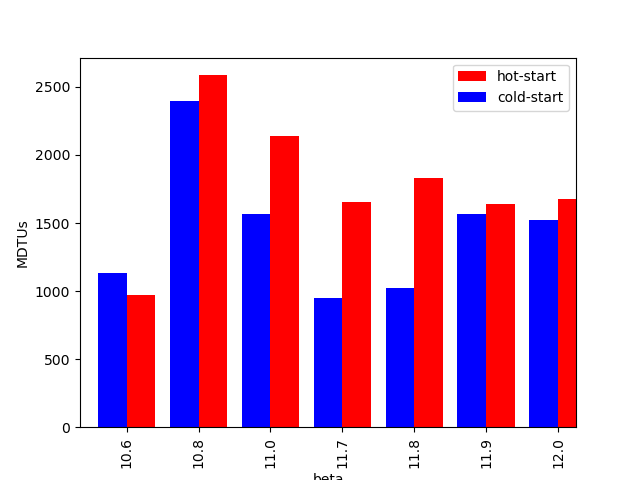

In [12]:
## Plot number of configs
df=df_sliced[(df_sliced.beta>10.5)&(df_sliced.beta<17.1)\
             &(df_sliced.Lx==16)&(df_sliced.Lt==8)&\
             (df_sliced.mf==0.1)]\
[['Lx','Lt','beta','run_label','num_conf']]
df.set_index('beta',inplace=True)

display(df)

width=0.4 

plt.figure()

label='hot-start'
df[df.run_label==label].num_conf.plot(kind='bar', width=width, color='red', position=0, label=label)

label='cold-start'
(df[df.run_label==label].num_conf).plot(kind='bar', width=width, color='blue', position=1, label=label)

plt.legend(loc='best')

plt.ylabel("MDTUs")
# plt.savefig('fig_output/num_confs_hot_cold.pdf')


In [13]:
def f_plot_vary_beta(df,obs,ylabel='y',op_fname=0): 
    
    plt.figure()

    for Lx in np.unique(df['Lx'].values):
        for Lt in np.unique(df['Lt'].values):
            for mf in np.unique(df['mf'].values):
                for (run_label,marker) in zip(np.unique(df['run_label'].values), itertools.cycle('o*d>^sDHPdpx_')):

                    df1=df[(df.Lx==Lx)&(df.Lt==Lt)&(df.mf==mf)&(df.run_label==run_label)].sort_values(by=['beta'])

                    label=r'${%s}^3 \times %s ,\ m_f=%s,\ %s$'%(Lx,Lt,mf,run_label)



                    x=df1.beta.values
                    y=df1[obs].values
                #     print(x,y)
                    plt.errorbar(x,gv.mean(y),gv.sdev(y),linestyle='',label=label,marker=marker)



    beta_list=np.unique(df.beta.values)
    plt.show()
    plt.xlabel(r'$\beta$')
    plt.xticks(np.arange(min(beta_list),max(beta_list)+0.2,0.5))
    plt.legend()
    plt.ylabel(ylabel,rotation='vertical')
    # plt.xlim(10.2,11.2)
    # plt.ylim(0,0.04)

    if op_fname:
        plt.savefig(op_fname)
        


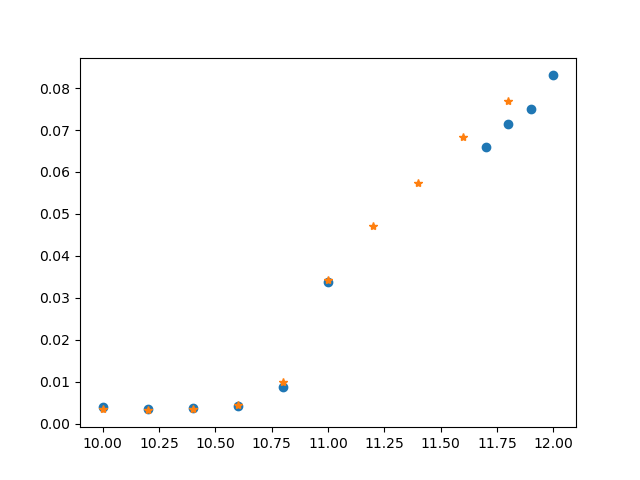

In [14]:
df=df_sliced[(df_sliced.Lx==16)&(df_sliced.Lt==8)&(df_sliced.mf==0.1)].reset_index(drop=True)
f_plot_vary_beta(df,'polyakov','Polyakov loop')

In [15]:
df=df_sliced[(((df_sliced.Lx==16)&(df_sliced.Lt==8))|((df_sliced.Lx==24)&(df_sliced.Lt==12)))\
             &(df_sliced.run_label=='hot-start')\
             &(df_sliced.mf==0.1)].reset_index(drop=True)




# f_plot_vary_beta(df,'polyakov','Polyakov loop')
# f_plot_vary_beta(df,'plaq','Plaquette')
# f_plot_vary_beta(df,'sus_plaq','$\chi_{Plaquette}$')
# f_plot_vary_beta(df,'sus_poly','$\chi_{Polyakov}$')
# f_plot_vary_beta(df,'accept','Acceptance')

# f_plot_vary_beta(df,'traj_time','Traj time')

In [16]:
df.columns

Index(['beta', 'mf', 'Lx', 'Lt', 'run_label', 'plaq', 'sus_plaq', 'kurt_plaq',
       'plaq_autocorr', 'polyakov', 'sus_poly', 'kurt_poly', 'poly_autocorr',
       'traj_time', 'accept', 'num_conf', 'run_key'],
      dtype='object')

In [17]:
## Testing groupby
df.head()

,beta,mf,Lx,Lt,run_label,plaq,sus_plaq,kurt_plaq,plaq_autocorr,polyakov,sus_poly,kurt_poly,poly_autocorr,traj_time,accept,num_conf,run_key
0,10.0,0.1,16,8,hot-start,0.413407(61),0.00130(16),1.34(32)e-07,3,0.00356(18),0.0116(28),3.6(2.3)e-07,1,141.410(26),78.125000,170,beta-10.0_mf-0.1_Lx-16_Lt-8_Ls-16_hot-start
1,10.2,0.1,16,8,hot-start,0.442028(92),0.00290(36),1.35(27)e-07,4,0.00336(18),0.0109(14),1.38(33)e-07,1,142.881(31),88.607595,168,beta-10.2_mf-0.1_Lx-16_Lt-8_Ls-16_hot-start
2,10.4,0.1,16,8,hot-start,0.51455(24),0.0208(20),1.09(21)e-07,20,0.00342(18),0.0115(21),2.4(1.3)e-07,1,133.97(10),92.215569,178,beta-10.4_mf-0.1_Lx-16_Lt-8_Ls-16_hot-start
3,10.6,0.1,16,8,hot-start,0.547041(33),0.00221(15),1.91(26)e-07,7,0.00457(10),0.0210(13),1.75(30)e-07,1,112.97(12),94.994786,970,beta-10.6_mf-0.1_Lx-16_Lt-8_Ls-16_hot-start
4,10.8,0.1,16,8,hot-start,0.564386(18),0.001676(69),1.89(18)e-07,5,0.00987(17),0.1484(52),1.55(13)e-07,72,98.823(74),93.864078,2586,beta-10.8_mf-0.1_Lx-16_Lt-8_Ls-16_hot-start


In [18]:
grp = df.groupby(by=['run_label','Lx','Lt'])

In [19]:
grp.get_group(('hot-start',16,8))

,beta,mf,Lx,Lt,run_label,plaq,sus_plaq,kurt_plaq,plaq_autocorr,polyakov,sus_poly,kurt_poly,poly_autocorr,traj_time,accept,num_conf,run_key
0,10.0,0.1,16,8,hot-start,0.413407(61),0.00130(16),1.34(32)e-07,3,0.00356(18),0.0116(28),3.6(2.3)e-07,1,141.410(26),78.125000,170,beta-10.0_mf-0.1_Lx-16_Lt-8_Ls-16_hot-start
1,10.2,0.1,16,8,hot-start,0.442028(92),0.00290(36),1.35(27)e-07,4,0.00336(18),0.0109(14),1.38(33)e-07,1,142.881(31),88.607595,168,beta-10.2_mf-0.1_Lx-16_Lt-8_Ls-16_hot-start
2,10.4,0.1,16,8,hot-start,0.51455(24),0.0208(20),1.09(21)e-07,20,0.00342(18),0.0115(21),2.4(1.3)e-07,1,133.97(10),92.215569,178,beta-10.4_mf-0.1_Lx-16_Lt-8_Ls-16_hot-start
3,10.6,0.1,16,8,hot-start,0.547041(33),0.00221(15),1.91(26)e-07,7,0.00457(10),0.0210(13),1.75(30)e-07,1,112.97(12),94.994786,970,beta-10.6_mf-0.1_Lx-16_Lt-8_Ls-16_hot-start
4,10.8,0.1,16,8,hot-start,0.564386(18),0.001676(69),1.89(18)e-07,5,0.00987(17),0.1484(52),1.55(13)e-07,72,98.823(74),93.864078,2586,beta-10.8_mf-0.1_Lx-16_Lt-8_Ls-16_hot-start
5,11.0,0.1,16,8,hot-start,0.578445(15),0.001042(43),1.70(15)e-07,2,0.03434(15),0.0935(42),1.87(20)e-07,4,85.852(52),93.802817,2140,beta-11.0_mf-0.1_Lx-16_Lt-8_Ls-16_hot-start
6,11.2,0.1,16,8,hot-start,0.590566(17),0.001008(51),1.87(23)e-07,3,0.04703(17),0.0931(50),2.00(27)e-07,2,82.464(42),93.795620,1654,beta-11.2_mf-0.1_Lx-16_Lt-8_Ls-16_hot-start
7,11.4,0.1,16,8,hot-start,0.601404(18),0.001254(62),1.91(21)e-07,3,0.05745(17),0.1141(53),1.79(21)e-07,3,79.238(50),94.243421,1834,beta-11.4_mf-0.1_Lx-16_Lt-8_Ls-16_hot-start
8,11.6,0.1,16,8,hot-start,0.611476(17),0.000967(45),1.65(16)e-07,3,0.06834(18),0.1149(59),1.87(24)e-07,3,76.782(47),93.443627,1642,beta-11.6_mf-0.1_Lx-16_Lt-8_Ls-16_hot-start
9,11.8,0.1,16,8,hot-start,0.620812(16),0.000875(43),1.82(23)e-07,3,0.07698(21),0.1484(66),1.58(14)e-07,6,76.515(38),93.592814,1680,beta-11.8_mf-0.1_Lx-16_Lt-8_Ls-16_hot-start


In [20]:
for name,group in grp:
    print(name)
    print(group)
    print()

('hot-start', 16, 8)
   beta   mf  Lx  Lt  run_label          plaq      sus_plaq     kurt_plaq  \
0  10.0  0.1  16   8  hot-start  0.413407(61)   0.00130(16)  1.34(32)e-07   
1  10.2  0.1  16   8  hot-start  0.442028(92)   0.00290(36)  1.35(27)e-07   
2  10.4  0.1  16   8  hot-start   0.51455(24)    0.0208(20)  1.09(21)e-07   
3  10.6  0.1  16   8  hot-start  0.547041(33)   0.00221(15)  1.91(26)e-07   
4  10.8  0.1  16   8  hot-start  0.564386(18)  0.001676(69)  1.89(18)e-07   
5  11.0  0.1  16   8  hot-start  0.578445(15)  0.001042(43)  1.70(15)e-07   
6  11.2  0.1  16   8  hot-start  0.590566(17)  0.001008(51)  1.87(23)e-07   
7  11.4  0.1  16   8  hot-start  0.601404(18)  0.001254(62)  1.91(21)e-07   
8  11.6  0.1  16   8  hot-start  0.611476(17)  0.000967(45)  1.65(16)e-07   
9  11.8  0.1  16   8  hot-start  0.620812(16)  0.000875(43)  1.82(23)e-07   

   plaq_autocorr     polyakov    sus_poly     kurt_poly  poly_autocorr  \
0              3  0.00356(18)  0.0116(28)  3.6(2.3)e-07  

In [21]:
group

,beta,mf,Lx,Lt,run_label,plaq,sus_plaq,kurt_plaq,plaq_autocorr,polyakov,sus_poly,kurt_poly,poly_autocorr,traj_time,accept,num_conf,run_key
0,10.0,0.1,16,8,hot-start,0.413407(61),0.00130(16),1.34(32)e-07,3,0.00356(18),0.0116(28),3.6(2.3)e-07,1,141.410(26),78.125000,170,beta-10.0_mf-0.1_Lx-16_Lt-8_Ls-16_hot-start
1,10.2,0.1,16,8,hot-start,0.442028(92),0.00290(36),1.35(27)e-07,4,0.00336(18),0.0109(14),1.38(33)e-07,1,142.881(31),88.607595,168,beta-10.2_mf-0.1_Lx-16_Lt-8_Ls-16_hot-start
2,10.4,0.1,16,8,hot-start,0.51455(24),0.0208(20),1.09(21)e-07,20,0.00342(18),0.0115(21),2.4(1.3)e-07,1,133.97(10),92.215569,178,beta-10.4_mf-0.1_Lx-16_Lt-8_Ls-16_hot-start
3,10.6,0.1,16,8,hot-start,0.547041(33),0.00221(15),1.91(26)e-07,7,0.00457(10),0.0210(13),1.75(30)e-07,1,112.97(12),94.994786,970,beta-10.6_mf-0.1_Lx-16_Lt-8_Ls-16_hot-start
4,10.8,0.1,16,8,hot-start,0.564386(18),0.001676(69),1.89(18)e-07,5,0.00987(17),0.1484(52),1.55(13)e-07,72,98.823(74),93.864078,2586,beta-10.8_mf-0.1_Lx-16_Lt-8_Ls-16_hot-start
5,11.0,0.1,16,8,hot-start,0.578445(15),0.001042(43),1.70(15)e-07,2,0.03434(15),0.0935(42),1.87(20)e-07,4,85.852(52),93.802817,2140,beta-11.0_mf-0.1_Lx-16_Lt-8_Ls-16_hot-start
6,11.2,0.1,16,8,hot-start,0.590566(17),0.001008(51),1.87(23)e-07,3,0.04703(17),0.0931(50),2.00(27)e-07,2,82.464(42),93.795620,1654,beta-11.2_mf-0.1_Lx-16_Lt-8_Ls-16_hot-start
7,11.4,0.1,16,8,hot-start,0.601404(18),0.001254(62),1.91(21)e-07,3,0.05745(17),0.1141(53),1.79(21)e-07,3,79.238(50),94.243421,1834,beta-11.4_mf-0.1_Lx-16_Lt-8_Ls-16_hot-start
8,11.6,0.1,16,8,hot-start,0.611476(17),0.000967(45),1.65(16)e-07,3,0.06834(18),0.1149(59),1.87(24)e-07,3,76.782(47),93.443627,1642,beta-11.6_mf-0.1_Lx-16_Lt-8_Ls-16_hot-start
9,11.8,0.1,16,8,hot-start,0.620812(16),0.000875(43),1.82(23)e-07,3,0.07698(21),0.1484(66),1.58(14)e-07,6,76.515(38),93.592814,1680,beta-11.8_mf-0.1_Lx-16_Lt-8_Ls-16_hot-start


## HMC time series plots

In [22]:
def f_plot_hmc_runs(df_input,column):
    ''' Plot behavior of quantity in MC time
    col = Plaquette, Polyakov, Traj_time, Accept'''
    
    keys_list=np.unique(df_hmc.run_key.values)
    assert len(keys_list)>0 ,"Shortened list has 0 elements" 
    
    plt.figure()

    
    for key,marker in zip(keys_list,itertools.cycle('>^*sDHPdpx_')):

        df=df_input[df_input.run_key==key]
        label=key

        x=df.iter.values
        if column=='Polyakov':
            y=np.abs(df[column].values)
        else:
            y=df[column].values

        plt.plot(x,y,linestyle='',label=label, marker=marker)

    plt.legend(loc='best')
    plt.ylabel(column)
    plt.xlabel('Trajectory')

def f_scatter_plot(df_input,equil=700):
    '''
    Scatter plot of complex values of Polyakov loop with equilibriation
    '''
    
    keys_list=np.unique(df_hmc.run_key.values)
    assert len(keys_list)>0 ,"Shortened list has 0 elements" 
    
    fig=plt.figure()

    for key,marker in zip(keys_list,itertools.cycle('*s>^DHPdpx_')):
        
        df=df_input[df_input.run_key==key]
#         display(df)

        beta=np.unique(df.beta.values)[0]
        run_label=np.unique(df.run_label.values)[0]
        label='beta-%s_%s'%(beta,run_label)
        
        x=df.iter.values[equil:]
        y=df.Polyakov.values[equil:]

        if y.shape[0]<1: 
            print("%s points for %s"%(y.shape[0],label))
            
        y1=y.real
        y2=y.imag
        
        plt.scatter(y1,y2,label=label,marker=marker)

    plt.legend(loc='best')
    plt.xlabel('Real Polyakov loop')
    plt.ylabel('Imag Polyakov loop')
    plt.title("Scatter plot")
    
# Histogram

def f_ploop_histogram(df_input,equil=700,bins=100):
    '''
    Histogram of the magnitude of the Polyakov loop 
    '''

    keys_list=np.unique(df_hmc.run_key.values)
    assert len(keys_list)>0 ,"Shortened list has 0 elements" 
    
    fig=plt.figure()
    
    for key in keys_list:
        
        df=df_input[df_input.run_key==key]
#         display(df)

        beta=np.unique(df.beta.values)[0]
        run_label=np.unique(df.run_label.values)[0]
        label='beta-%s_%s'%(beta,run_label)

        x=df.iter.values[equil:]
        y=np.abs(df.Polyakov.values)[equil:]

        plt.hist(y,bins=100,label=label)
        plt.legend(loc='best')
#         plt.title("Polyakov loop Histogram for beta: %s"%(beta))


In [23]:
def f_get_hmc_data(dict1,fname1):
    '''
    Given a dictionary, extract the time series for just that set of couplings
    '''

    sql_query='SELECT * FROM test \
    WHERE Lx={Lx} \
    AND Lt={Lt} \
    AND mf={mf} \
    AND beta IN {beta}\
    '.format(**dict1)
    
    print(sql_query)
    
    conn = sqlite3.connect(fname1)
    df_read=pd.read_sql_query(sql_query,conn)
    df_read['Polyakov']=df_read['Polyakov'].astype(np.complex128)
    conn.close()
    
    return df_read




In [59]:
fname1='Stored_data/sql_dbase_files/parsed_hmc.db'

In [60]:

dict1={'Lx':'16', 'Lt':'8','mf':'0.1',  'beta':'(10.8)' }
df_hmc=f_get_hmc_data(dict1,fname1)
df_hmc

SELECT * FROM test     WHERE Lx=16     AND Lt=8     AND mf=0.1     AND beta IN (10.8)    


,Plaquette,iter,Polyakov,Traj_time,Accept,Lx,Lt,beta,mf,run_label,run_key
0,0.226372,1.0,0.001163-0.002290j,102.634003,NaN,16,8,10.8,0.1,hot-start,beta-10.8_mf-0.1_Lx-16_Lt-8_Ls-16_hot-start
1,0.316667,2.0,0.001864+0.002196j,125.973999,NaN,16,8,10.8,0.1,hot-start,beta-10.8_mf-0.1_Lx-16_Lt-8_Ls-16_hot-start
2,0.367048,3.0,0.000905+0.001463j,135.761002,NaN,16,8,10.8,0.1,hot-start,beta-10.8_mf-0.1_Lx-16_Lt-8_Ls-16_hot-start
3,0.399480,4.0,-0.004220-0.000316j,139.828003,NaN,16,8,10.8,0.1,hot-start,beta-10.8_mf-0.1_Lx-16_Lt-8_Ls-16_hot-start
4,0.423458,5.0,-0.006263-0.000021j,141.248993,NaN,16,8,10.8,0.1,hot-start,beta-10.8_mf-0.1_Lx-16_Lt-8_Ls-16_hot-start
...,...,...,...,...,...,...,...,...,...,...,...
4975,0.563848,2391.0,-0.000522-0.001461j,105.352997,1.0,16,8,10.8,0.1,cold-start,beta-10.8_mf-0.1_Lx-16_Lt-8_Ls-16_cold-start
4976,0.563748,2392.0,-0.005199-0.003383j,102.129997,1.0,16,8,10.8,0.1,cold-start,beta-10.8_mf-0.1_Lx-16_Lt-8_Ls-16_cold-start
4977,0.563748,2393.0,-0.005199-0.003383j,101.683998,0.0,16,8,10.8,0.1,cold-start,beta-10.8_mf-0.1_Lx-16_Lt-8_Ls-16_cold-start
4978,0.563525,2394.0,-0.008637-0.000436j,101.417999,1.0,16,8,10.8,0.1,cold-start,beta-10.8_mf-0.1_Lx-16_Lt-8_Ls-16_cold-start


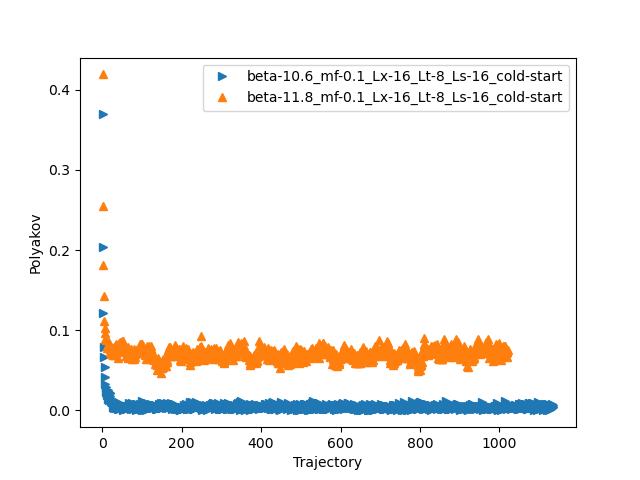

In [68]:
## Time series plots


# f_plot_hmc_runs(df_hmc,'Plaquette')
# # plt.savefig('fig_output/Plaq_details.pdf')
f_plot_hmc_runs(df_hmc,'Polyakov')
# f_plot_hmc_runs(df_hmc,'Traj_time')
# f_plot_hmc_runs(df_hmc,'Accept')


SELECT * FROM test     WHERE Lx=16     AND Lt=8     AND mf=0.1     AND beta IN (10.6, 11.8)    


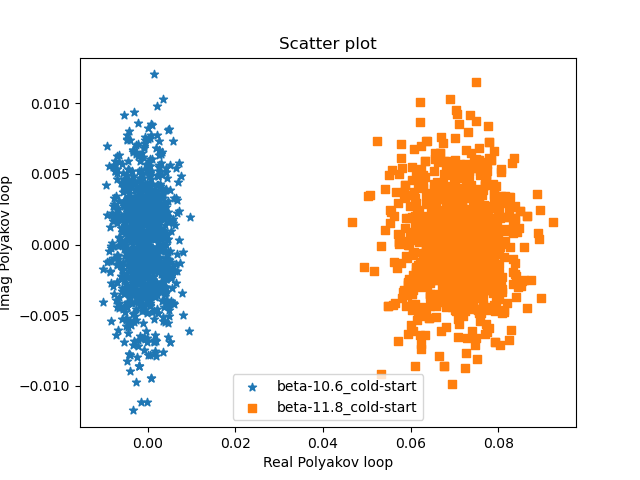

In [67]:

dict1={'Lx':'16', 'Lt':'8','mf':'0.1',  'beta':'(10.6, 11.8)' }
df_hmc=f_get_hmc_data(dict1,fname1)

df_hmc=df_hmc[df_hmc.run_label=='cold-start']

# f_ploop_histogram(df_hmc,100)
f_scatter_plot(df_hmc,50)

In [ ]:
df_hmc